In [2]:
import mysql.connector
import requests
import pandas as pd
from sqlalchemy import create_engine

In [2]:
response = requests.get("https://data.nasa.gov/resource/gh4g-9sfh.json")
data = response.json()

In [3]:
data

[{'name': 'Aachen',
  'id': '1',
  'nametype': 'Valid',
  'recclass': 'L5',
  'mass': '21',
  'fall': 'Fell',
  'year': '1880-01-01T00:00:00.000',
  'reclat': '50.775000',
  'reclong': '6.083330',
  'geolocation': {'latitude': '50.775', 'longitude': '6.08333'}},
 {'name': 'Aarhus',
  'id': '2',
  'nametype': 'Valid',
  'recclass': 'H6',
  'mass': '720',
  'fall': 'Fell',
  'year': '1951-01-01T00:00:00.000',
  'reclat': '56.183330',
  'reclong': '10.233330',
  'geolocation': {'latitude': '56.18333', 'longitude': '10.23333'}},
 {'name': 'Abee',
  'id': '6',
  'nametype': 'Valid',
  'recclass': 'EH4',
  'mass': '107000',
  'fall': 'Fell',
  'year': '1952-01-01T00:00:00.000',
  'reclat': '54.216670',
  'reclong': '-113.000000',
  'geolocation': {'latitude': '54.21667', 'longitude': '-113.0'}},
 {'name': 'Acapulco',
  'id': '10',
  'nametype': 'Valid',
  'recclass': 'Acapulcoite',
  'mass': '1914',
  'fall': 'Fell',
  'year': '1976-01-01T00:00:00.000',
  'reclat': '16.883330',
  'reclong': 

In [4]:
df = pd.DataFrame(data)

In [15]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01,50.775000,6.083330,"{'latitude': '50.775', 'longitude': '6.08333'}",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01,56.183330,10.233330,"{'latitude': '56.18333', 'longitude': '10.23333'}",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01,54.216670,-113.000000,"{'latitude': '54.21667', 'longitude': '-113.0'}",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01,16.883330,-99.900000,"{'latitude': '16.88333', 'longitude': '-99.9'}",NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01,-33.166670,-64.950000,"{'latitude': '-33.16667', 'longitude': '-64.95'}",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934-01-01,13.633330,79.416670,"{'latitude': '13.63333', 'longitude': '79.41667'}",NaN,NaN
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011-01-01,29.481950,-7.611230,"{'latitude': '29.48195', 'longitude': '-7.61123'}",NaN,NaN
997,Tjabe,24011,Valid,H6,20000,Fell,1869-01-01,-7.083330,111.533330,"{'latitude': '-7.08333', 'longitude': '111.533...",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01,-6.666670,106.583330,"{'latitude': '-6.66667', 'longitude': '106.583...",NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         1000 non-null   object
 1   id                           1000 non-null   object
 2   nametype                     1000 non-null   object
 3   recclass                     1000 non-null   object
 4   mass                         972 non-null    object
 5   fall                         1000 non-null   object
 6   year                         999 non-null    object
 7   reclat                       988 non-null    object
 8   reclong                      988 non-null    object
 9   geolocation                  988 non-null    object
 10  :@computed_region_cbhk_fwbd  133 non-null    object
 11  :@computed_region_nnqa_25f4  134 non-null    object
dtypes: object(12)
memory usage: 93.9+ KB


In [7]:
import re

date_string = "1880-01-01T00:00:00.000"

# Define a regular expression pattern to match the date part
pattern = r'^(\d{4}-\d{2}-\d{2})'

# Use re.search to find the matching pattern in the input string
match = re.search(pattern, date_string)

# Check if a match is found and extract the date part
if match:
    extracted_date = match.group(1)
    print(extracted_date)
else:
    print("No date found in the input string.")

1880-01-01


In [13]:
df['year'] = df['year'].astype('str')

In [11]:
def date_reformat(date):
    pattern = r'^(\d{4}-\d{2}-\d{2})'
    match = re.search(pattern, date)
    if match:
        return match.group(1)
    else:
        return None

In [14]:
df['year'] = df['year'].apply(date_reformat)

In [16]:
df['id'] = df['id'].astype('int')
df['mass'] = df['mass'].astype('float')
df['reclat'] = df['reclat'].astype('float')
df['reclong'] = df['reclong'].astype('float')

In [17]:
df.describe()

,id,mass,reclat,reclong
count,1000.00000,9.720000e+02,988.000000,988.000000
mean,15398.72800,5.019020e+04,29.691592,19.151208
std,10368.70402,7.539857e+05,23.204399,68.644015
min,1.00000,1.500000e-01,-44.116670,-157.866670
25%,7770.50000,6.795000e+02,21.300000,-5.195832
50%,12757.50000,2.870000e+03,35.916665,17.325000
75%,18831.25000,1.005000e+04,45.817835,76.004167
max,57168.00000,2.300000e+07,66.348330,174.400000


In [18]:
df = df.drop("geolocation", axis = 1)

In [19]:
conn = mysql.connector.connect(host='localhost',
                                    database= "sgtbootfinal",
                                    user='root',
                                    password='')

In [20]:
engine = create_engine('mysql+mysqlconnector://root:@localhost/sgtbootfinal')

In [21]:
df.to_sql(name='meteorite_landings', con=engine, if_exists='replace', index=False)

1000

In [22]:
cursor = conn.cursor()

primary_key_sql = """
ALTER TABLE meteorite_landings
ADD PRIMARY KEY (id);
"""

cursor.execute(primary_key_sql)

conn.commit()


In [23]:

cursor.close()
conn.close()

# Getting the table from mysql database

In [3]:
engine = create_engine('mysql+mysqlconnector://root:@localhost/sgtbootfinal')

In [4]:
query = "SELECT * FROM meteorite_landings"
meteor = pd.read_sql(query, engine)

In [5]:
meteor

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,None,None
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,None,None
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,None,None
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,None,None
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,None,None
...,...,...,...,...,...,...,...,...,...,...,...
995,Battle Mountain,56133,Valid,L6,2900.0,Fell,2012-01-01,40.66813,-117.18913,10,2397
996,Ouadangou,56729,Valid,L5,4440.0,Fell,2003-01-01,12.90000,0.08000,None,None
997,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013-01-01,54.81667,61.11667,None,None
998,Boumdeid (2011),57167,Valid,L6,3599.0,Fell,2011-01-01,17.17493,-11.34133,None,None


In [6]:
import matplotlib.pyplot as plt

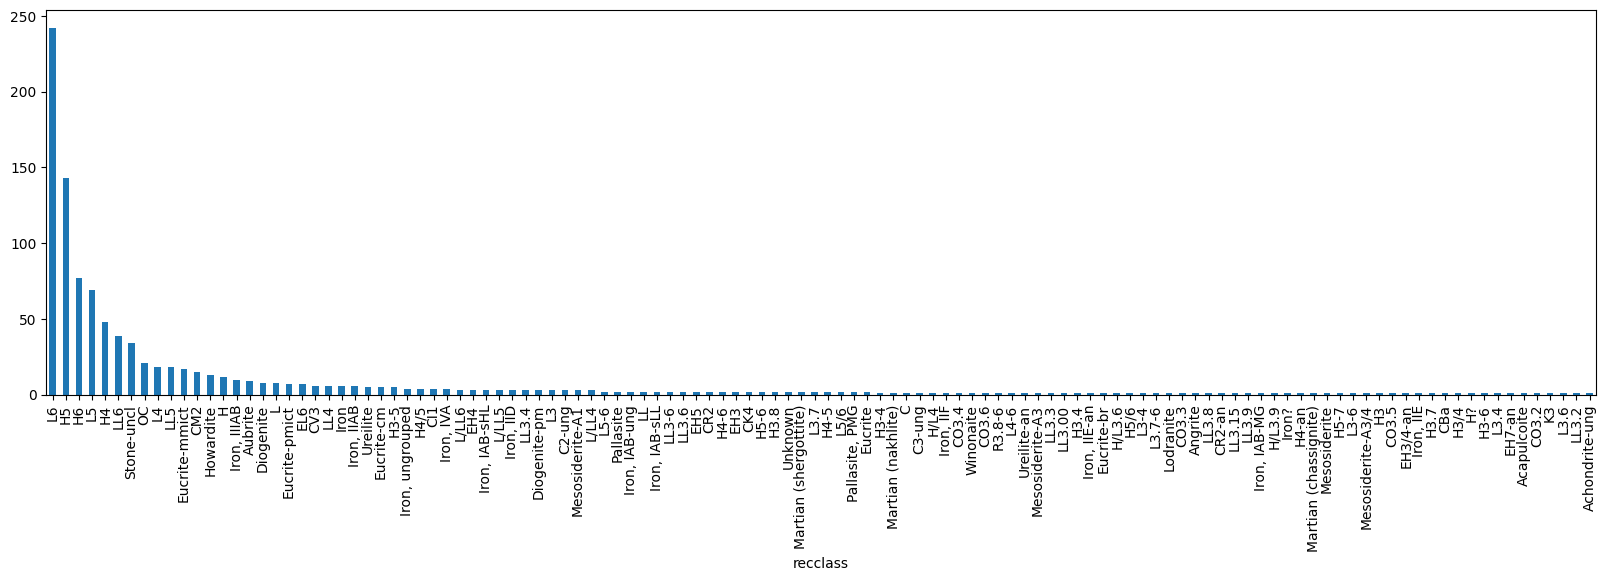

In [7]:
# Counts of meteorite categories

fig, ax = plt.subplots(figsize=(20, 5))
meteor['recclass'].value_counts().plot(kind='bar')
plt.show()

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd
import geodatasets

In [9]:
df_geo = gpd.GeoDataFrame(meteor, geometry = gpd.points_from_xy(meteor.reclong, meteor.reclat))


In [10]:
df_geo

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,geometry
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,None,None,POINT (6.08333 50.77500)
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,None,None,POINT (10.23333 56.18333)
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,None,None,POINT (-113.00000 54.21667)
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,None,None,POINT (-99.90000 16.88333)
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,None,None,POINT (-64.95000 -33.16667)
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Battle Mountain,56133,Valid,L6,2900.0,Fell,2012-01-01,40.66813,-117.18913,10,2397,POINT (-117.18913 40.66813)
996,Ouadangou,56729,Valid,L5,4440.0,Fell,2003-01-01,12.90000,0.08000,None,None,POINT (0.08000 12.90000)
997,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013-01-01,54.81667,61.11667,None,None,POINT (61.11667 54.81667)
998,Boumdeid (2011),57167,Valid,L6,3599.0,Fell,2011-01-01,17.17493,-11.34133,None,None,POINT (-11.34133 17.17493)


In [17]:
world_data = gpd.read_file('ne_10m_admin_0_countries.shp')

<Figure size 2500x1500 with 0 Axes>

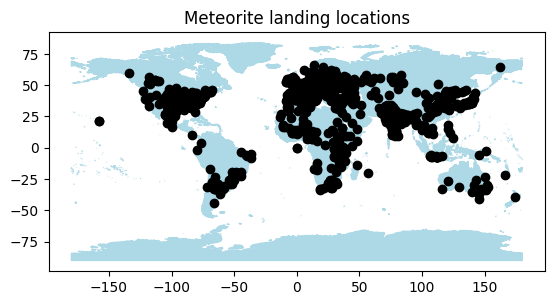

In [20]:
plt.figure(figsize=(25,15))
axis = world_data.plot(color = 'lightblue', edgecolor = 'lightblue')

df_geo.plot(ax = axis, color = 'black')
plt.title('Meteorite landing locations')

plt.show()

### We cannot use all of the datestamps since there are older entries than 1677:

In [34]:
# min value for a pandas.Timestamp value
print(pd.Timestamp.min)
# max value for a pandas.Timestamp value
print(pd.Timestamp.max)

1677-09-21 00:12:43.145224193
2262-04-11 23:47:16.854775807
